
# Diffusion Monte Carlo

### Find the ground state wavefunction and energy for the harmonic oscillator


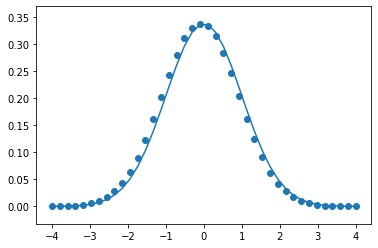

In [167]:
#INPUT

import numpy as np
import matplotlib.pyplot as plt
import math

#constants
n0=500;
nMax=2000;
t0=100;
deltaT=0.01;
xMin=-4.0;
xMax=4.0
nBins=40; #number of spatial boxes
# hBar = 1.054571726*pow(10,-47) #hbar=1

e_R = 0.2

psips=initialise_replicas(n0,nMax) #two dimensional matrix psips

# calculate energy

# energy(psips,t0,deltaT,e_R,n0, nMax)

# calculate Ground State 

groundState(psips,t0,deltaT,e_R,n0,nMax,xMin,xMax,nBins)


In [2]:
#INITIALISE REPLICAS


def initialise_replicas(n0,nMax):
    psips=[[0 for i in range(0,2)] for i in range (0,nMax)];
    for i in range (0,n0):
        psips[i][0]=1;


    return psips;



In [3]:
#WALK
import math
from random import gauss

def walk(psips,deltaT):
    for i in range (0,len(psips)):
        if psips[i][0]==1:
            psips[i][1]=psips[i][1]+math.sqrt(deltaT)*gauss(0.0,1.0);

    return psips;



In [58]:
#BRANCH
import math
import random


def branch(psips,e_R,deltaT,n0, nMax):
    

    hbar = 1.054571726*pow(10,-34) 
#     calculate the initial number of replicas
    nInitial=0
    for i in range(0,len(psips)):
        if psips[i][0]==1:
            nInitial+=1
            
#     determine a stopping point
    last=0
    for i in reversed(range(0,len(psips))):
        if psips[i][0]==1:
            last=i
            break
    
#     birth-death process

    m_0=0; m_1=0; m_2=0; m_3=0 #number of particles that have m=0/1/2/3
    
    
    vSum=0
    nFinal=0
    for i in range(0,last+1):
        if(psips[i][0]==1):
            v= 0.5*pow(psips[i][1],2)
            w= math.exp(-(v-e_R)*deltaT)
            u= random.uniform(0,1)
            m= min(math.modf(w+u)[1],3) # each particle is replaced by m ones
            if m==0:
                m_0+=1
                psips[i][0]=0; #dead
            if m==1:
                m_1+=1
                vSum+=v
                nFinal+=1
            if m==2:
                m_2+=1
                vSum+=2*v
                nFinal+=2
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break
            if m==3:
                m_3+=1
                vSum+=3*v
                nFinal+=3
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break
                for j in range(0,len(psips)):
                    if(psips[j][0]==0):
                        psips[j][0]=1
                        psips[j][1]=psips[i][1]
                        break

#     print(m_0,end=" ");    print(m_1,end=" ");    print(m_2,end=" ");    print(m_3,end=" ");

#     calculate energies and average potential
    if nFinal!=0:
        vAverage=vSum/nFinal
        e_R=vAverage + hbar*(1-nFinal/nInitial)/deltaT

    return psips, e_R, nInitial, nFinal;



In [124]:
#COUNT

import numpy as np

def count(psips,xMin,xMax, nBins):
    #     determine a stopping point
    last=0
    for i in reversed(range(0,len(psips))):
        if psips[i][0]==1:
            last=i
            break
            
    bins=np.linspace(xMin,xMax,nBins)
    replicaCount=[0]*nBins
    for i in range(0,last):
        if psips[i][0]==1: 
            for j in range(0,len(bins)-1):
                if psips[i][1]>=bins[j] and psips[i][1]<=bins[j+1]:
                    replicaCount[j]+=1
                    break
    return bins,replicaCount;

# psips=initialise_replicas(n0,nMax) #two dimensional matrix psips
# for i in range(0,10000):
#         psips=walk(psips,deltaT)
#         psips, e_R, n1, n2 = branch(psips,e_R,deltaT,n0, nMax)
# # print(psips)
# count(psips,-20,20,200)



In [125]:
#ENERGY

def energy(psips,t0,deltaT,e_R,n0,nMax):
    
    steps=math.floor(t0/deltaT)

    er1=[0]*(steps+1) #contains all the energies
    er1[0]=e_R
    totalE=e_R
    er2=[0]*(steps+1) #contains all the reference energies
    er2[0]=e_R
    
    for i in range (0,steps):
        psips=walk(psips,deltaT)
        psips, e_R, n1, n2 = branch(psips,e_R,deltaT,n0, nMax)
        er1[i+1]=e_R
        totalE+=e_R
        er2[i+1]=totalE/(i+2)
    #     print(er1[i+1], end=" ");    print(er2[i+1], end=" "); print (n1)
        if n1==0:
            break
        if n2==0:
            break

    plt.plot(er2)
    plt.show()



In [166]:
#GROUND STATE

def groundState(psips,t0,deltaT,e_R,n0,nMax,xMin,xMax,nBins):
    

    steps=math.floor(t0/deltaT)
    distrib=[0]*nBins
    for i in range(0,steps):
        psips=walk(psips,deltaT)
        psips, e_R, n1, n2 = branch(psips,e_R,deltaT,n0, nMax)
    
#     bins, replicaCount = count(psips,-20,20,200)
#     plt.plot(replicaCount)
#     for j in range(0,nBins):
#         distrib[j]+=replicaCount[j]
    
    for i in range(0,steps):
        psips=walk(psips,deltaT)
        psips, e_R, n1, n2 = branch(psips,e_R,deltaT,n0, nMax)
        bins, replicaCount = count(psips,xMin,xMax,nBins)
        for j in range(0,nBins):
            distrib[j]+=replicaCount[j]
    
#     print(psips)
    sumSquares=0
    for i in range(0,nBins):
        sumSquares+=math.pow(distrib[i],2)
        
    for i in range(0,nBins):
        distrib[i]=distrib[i]/math.sqrt(sumSquares)
    
    x=np.linspace(xMin,xMax,nBins)
    plt.scatter(x,distrib)
    plt.show
    
    y=max(distrib)*np.exp(-x*x/2)
    plt.plot(x,y)
    plt.show


        
        